# **LAB 2 - PART 2 SVR**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import metrics
import pandas_datareader.data as web
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.decomposition import PCA

### **Retrieve the Financial Data**
Historical stock prices for a set of stocks, foreign exchange rates, and key market indices.

Ticker:
- stock tickers : `stk_tickers = ['MSFT', 'IBM', 'GOOGL']`
- foreign exchange tickers : `ccy_tickers = ['DEXJPUS', 'DEXUSUK']`
- market index tickers : `idx_tickers = ['SP500', 'DJIA', 'VIXCLS']`

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `yf.download()`
- `web.DataReader()`
</details>

In [19]:
### START CODE HERE ###
#ราคาใกล้ปิด (Adj close) ของหุ้นกลุ่ม Technology 3 ตัว
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
#อัตราแลกเปลี่ยนสกุลเงิน
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
#ค่าดัชนีตลาดหุ้น
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

stk_data = yf.download(stk_tickers,start='2018-12-31', end='2023-01-10') #To download price history from Yahoo Finance into one table
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')
### END CODE HERE ###

[*********************100%%**********************]  3 of 3 completed


### **Exploring the Data**

In [3]:
stk_data

Adj Close                              Close              \
                GOOGL         IBM        MSFT      GOOGL         IBM   
Date                                                                   
2018-12-31  52.248001   85.148727   96.450592  52.248001  108.671127   
2019-01-02  52.734001   86.302315   96.023262  52.734001  110.143402   
2019-01-03  51.273499   84.579407   92.490776  51.273499  107.944550   
2019-01-04  53.903500   87.882881   96.792450  53.903500  112.160614   
2019-01-07  53.796001   88.504623   96.915878  53.796001  112.954109   
...               ...         ...         ...        ...         ...   
2023-01-03  89.120003  134.852539  237.474335  89.120003  141.550003   
2023-01-04  88.080002  135.852875  227.086456  88.080002  142.600006   
2023-01-05  86.199997  134.433350  220.356125  86.199997  141.110001   
2023-01-06  87.339996  136.900787  222.953079  87.339996  143.699997   
2023-01-09  88.019997  136.757904  225.123840  88.019997  143.550003   

                             High                                Low  \
                  MSFT      GOOGL         IBM        MSFT      GOOGL   
Date                                                                   
2018-12-31  101.570000  53.149502  109.321220  102.400002  51.652000   
2019-01-02  101.120003  53.039501  110.879539  101.750000  51.264000   
2019-01-03   97.400002  53.313000  109.827919  100.190002  51.118500   
2019-01-04  101.930000  54.000000  112.323135  102.510002  51.842999   
2019-01-07  102.059998  54.134998  113.604210  103.269997  53.132000   
...                ...        ...         ...         ...        ...   
2023-01-03  239.580002  91.050003  141.899994  245.750000  88.519997   
2023-01-04  229.100006  90.650002  143.619995  232.869995  87.269997   
2023-01-05  222.309998  87.570000  142.500000  227.550003  85.900002   
2023-01-06  224.929993  87.690002  144.250000  225.759995  84.860001   
2023-01-09  227.119995  90.050003  145.470001  231.240005  87.860001   

                                         Open                          \
                   IBM        MSFT      GOOGL         IBM        MSFT   
Date                                                                    
2018-12-31  107.476097  100.440002  52.891499  108.346077  101.290001   
2019-01-02  106.778206   98.940002  51.360001  107.084129   99.550003   
2019-01-03  107.734222   97.199997  52.533501  109.493309  100.099998   
2019-01-04  109.407265   98.930000  52.127998  109.856598   99.720001   
2019-01-07  111.539200  100.980003  54.048500  112.332695  101.639999   
...                ...         ...        ...         ...         ...   
2023-01-03  140.479996  237.399994  89.589996  141.100006  243.080002   
2023-01-04  141.369995  225.960007  90.349998  142.070007  232.279999   
2023-01-05  140.009995  221.759995  87.470001  142.440002  227.199997   
2023-01-06  141.580002  219.350006  86.790001  142.380005  223.000000   
2023-01-09  143.399994  226.410004  88.360001  144.080002  226.449997   

              Volume                     
               GOOGL      IBM      MSFT  
Date                                     
2018-12-31  33110000  5212009  33173800  
2019-01-02  31868000  4434935  35329300  
2019-01-03  41960000  4546648  42579100  
2019-01-04  46022000  4683779  44060600  
2019-01-07  47446000  3923755  35656100  
...              ...      ...       ...  
2023-01-03  28131200  3338600  25740000  
2023-01-04  34854800  3869200  50623400  
2023-01-05  27194400  2866600  39585600  
2023-01-06  41381500  3574000  43613600  
2023-01-09  29003900  3987700  27369800  

[1014 rows x 18 columns]

In [4]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2019-01-22,109.34,1.2955
2019-01-23,109.44,1.3074
2019-01-24,109.72,1.3027
2019-01-25,109.60,1.3176
2019-01-28,109.20,1.3158
...,...,...
2024-01-08,143.89,1.2766
2024-01-09,144.35,1.2720
2024-01-10,145.68,1.2730


In [5]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2019-01-22,2632.90,24404.48,20.80
2019-01-23,2638.70,24575.62,19.52
2019-01-24,2642.33,24553.24,18.89
2019-01-25,2664.76,24737.20,17.42
2019-01-28,2643.85,24528.22,18.87
...,...,...,...
2024-01-15,NaN,NaN,13.25
2024-01-16,4765.98,37361.12,13.84
2024-01-17,4739.21,37266.67,14.79


Let's
- `base` be stk_data's `'Adj Close'` and `'MSFT'`<br>
- `X1` be `stk_data`'s `'Adj Close'` and `('GOOGL','IBM')`<br>
- `X2` be `ccy_data`<br>
- `X3` be `idx_data`


In [6]:
### START CODE HERE ###
base_ticker = 'MSFT' #ราคาหุ้น Microsoft ที่ต้องการทํานาย (base)
base = stk_data['Adj Close'][base_ticker]

X1_tickers = ['GOOGL', 'IBM']
X1 = stk_data['Adj Close'][X1_tickers]
X2 = ccy_data
X3 = idx_data
# print(X1.index.name)
### END CODE HERE ###

Create lagged and differenced features for time series analysis<br>
- `Y` : difference price of `'Adj Close', 'MSFT'` for past `n` days.
- `X4_[k]DT` : difference price of `'Adj Close', 'MSFT'` for past or next `[k]*n` days. Please select 3 values for `k`.
Concatenate the resulting features `X4_[k[0]]DT`, `X4_[k[1]]DT`, `X4_[k[2]]DT` into a single feature set `X4`. Finally, standardize the values in `X4`.<br>
(See detail explanation in lab direction)


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.diff()`
- `.shift()`
</details>

In [7]:
### START CODE HERE ###
return_period = 3
k = [3, 6, 12]

Y = base.shift(-return_period)

### Choose calculation of difference price either past (Guide#1) or next (Guide#2)

### Guide#1 for using price of past [k]*n days
X4_3DT = pd.DataFrame({'MSFT_3DT':base.diff(k[0]*return_period)})
X4_6DT = pd.DataFrame({'MSFT_6DT':base.diff(k[1]*return_period)})
X4_12DT = pd.DataFrame({'MSFT_12DT':base.diff(k[2]*return_period)})

### Guide#2 for using price of next [k]*n days
X4_3DT = pd.DataFrame({'MSFT_3DT':base.diff(k[0]*return_period).shift(-k[0]*return_period)})
X4_6DT = pd.DataFrame({'MSFT_6DT':base.diff(k[1]*return_period).shift(-k[1]*return_period)})
X4_12DT = pd.DataFrame({'MSFT_12DT':base.diff(k[2]*return_period).shift(-k[2]*return_period)})


X4 = pd.concat([X4_3DT,X4_6DT,X4_12DT],axis=1)

### END CODE HERE ###

**Standardize `X1-4`**

***NOTE:*** Please ensure that each of ***X1-4's index columns*** is the ***date column***.

In [8]:
### START CODE HERE ###
standard_scaler = preprocessing.StandardScaler()
# X1 = X1.set_index('DATE')
# X1 = standard_scaler.fit_transform(X1)
# X2 = standard_scaler.fit_transform(X2)
# X3 = standard_scaler.fit_transform(X3)
# X4 = standard_scaler.fit_transform(X4)

X1_standardize = pd.DataFrame(standard_scaler.fit_transform(X1), columns=X1.columns, index=X1.index)
X2_standardize = pd.DataFrame(standard_scaler.fit_transform(X2), columns=X2.columns, index=X2.index)
X3_standardize = pd.DataFrame(standard_scaler.fit_transform(X3), columns=X3.columns, index=X3.index)
X4_standardize = pd.DataFrame(standard_scaler.fit_transform(X4), columns=X4.columns, index=X4.index)


### END CODE HERE ###

Concatenate `X1-4` to `X` by index. Then concatenate `X` and `Y` to `dataset` by index.

***NOTE:*** Please ensure that each of ***X1-3's index columns*** is the ***date column***.

In [9]:
### START CODE HERE ###
X = pd.concat([X1_standardize, X2_standardize, X3_standardize, X4_standardize], axis=1)

dataset = pd.concat([X,Y],axis=1)
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

| Date       | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|------------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| 2018-12-31 | -1.545378          | -1.993072         | -0.652377 | -0.107177 | -1.966763| -1.936393| 0.492393 | 0.455826 | 3.333092 | 9.376259  | 96.792442         |
| 2019-01-01 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2019-01-02 | -1.529007          | -1.918422         | -0.684528 | -0.3554   | -1.961748| -1.931557| 0.224562 | 3.693924 | 1.728264 | 10.394836 | 96.915886         |
| 2019-01-03 | -1.578206          | -2.029912         | -0.761557 | -0.302747 | -2.05974 | -2.10151 | 0.496045 | 7.577789 | 8.52739  | 14.661652 | 97.618576         |
| 2019-01-04 | -1.48961           | -1.816142         | -0.746821 | -0.141777 | -1.927197| -1.909175| 0.000558 | 3.978821 | 2.373985 | 10.178764 | 99.014511         |
| ...        | ...                | ...               | ...       | ...       | ...      | ...      | ...      | ...      | ...      | ...       | ...               |
| 2023-12-22 | 1.46086            | 2.989076          | 1.551328  | -0.171865 | 1.577892 | 1.683629 | -1.015981| NaN      | NaN      | NaN       | 375.279999        |
| 2023-12-25 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2023-12-26 | 1.46187            | 3.058317          | NaN       | NaN       | 1.60962  | 1.724664 | -1.020851| NaN      | NaN      | NaN       | NaN               |
| 2023-12-27 | 1.42313            | 3.074495          | NaN       | NaN       | 1.620391 | 1.753295 | -1.089026| NaN      | NaN      | NaN       | NaN               |
| 2023-12-28 | 1.418414           | 3.09326           | NaN       | NaN       | 1.623182 | 1.767092 | NaN      | NaN      | NaN      | NaN       | NaN               |

</details>

In [10]:
dataset

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT
2018-12-31,-1.359035,-2.185603,NaN,NaN,NaN,NaN,NaN,-0.069212,0.056848,0.215580,96.792450
2019-01-02,-1.342834,-2.088507,NaN,NaN,NaN,NaN,NaN,0.232088,-0.053138,0.268067,96.915878
2019-01-03,-1.391520,-2.233522,NaN,NaN,NaN,NaN,NaN,0.593467,0.412843,0.487934,97.618584
2019-01-04,-1.303849,-1.955472,NaN,NaN,NaN,NaN,NaN,0.258592,-0.008884,0.256933,99.014473
2019-01-07,-1.307432,-1.903141,NaN,NaN,NaN,NaN,NaN,0.387599,-0.124728,0.243694,98.378273
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-15,NaN,NaN,NaN,NaN,NaN,NaN,-0.974057,NaN,NaN,NaN,NaN
2024-01-16,NaN,NaN,NaN,NaN,1.567136,1.641930,-0.902570,NaN,NaN,NaN,NaN
2024-01-17,NaN,NaN,NaN,NaN,1.524659,1.617548,-0.787463,NaN,NaN,NaN,NaN
2024-01-18,NaN,NaN,NaN,NaN,1.590874,1.669678,-0.867432,NaN,NaN,NaN,NaN


**Drop NA**

Drop NA from `dataset`.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
DatetimeIndex: 1207 entries, 2018-12-31 to 2023-11-06
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  1207 non-null   float64
 1   (Adj Close, IBM)    1207 non-null   float64
 2   DEXJPUS             1207 non-null   float64
 3   DEXUSUK             1207 non-null   float64
 4   SP500               1207 non-null   float64
 5   DJIA                1207 non-null   float64
 6   VIXCLS              1207 non-null   float64
 7   MSFT_3DT            1207 non-null   float64
 8   MSFT_6DT            1207 non-null   float64
 9   MSFT_12DT           1207 non-null   float64
 10  (Adj Close, MSFT)   1207 non-null   float64
dtypes: float64(11)
memory usage: 113.2 KB
```
<br>

| Statistic | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|-----------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| count     | 1207.000000        | 1207.000000       | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 |
| mean      | -0.035934          | -0.076293         | -0.048627 | 0.010266  | -0.038274| -0.038135| 0.032071 | 2.003695 | 4.026331 | 8.035808  | 228.156289        |
| std       | 0.990693           | 0.898243          | 0.967200  | 1.011495 | 0.987860 | 0.988187 | 1.006162 | 11.217826 | 15.534667 | 20.737484 | 70.323041         |
| min       | -1.578206          | -2.638620         | -1.133307 | -3.206211 | -2.391674 | -3.155777 | -1.197376 | -33.900146 | -52.498260 | -60.695969 | 96.792442         |
| 25%       | -0.995937          | -0.771499         | -0.759213 | -0.719462 | -1.006790 | -0.968910 | -0.631888 | -3.104721 | -4.466766 | -1.814156 | 165.381950        |
| 50%       | 0.007967           | -0.093102         | -0.598791 | 0.029723  | 0.217450  | 0.238699  | -0.194228 | 2.514923 | 4.754410 | 9.164612  | 238.217758        |
| 75%       | 0.814595           | 0.512558          | 0.890217  | 0.725501  | 0.808928  | 0.821986  | 0.480219  | 8.710037 | 13.093704 | 20.562767 | 284.131805        |
| max       | 1.742090           | 2.083764          | 2.144788  | 2.036573  | 1.644014  | 1.532654  | 7.464517  | 35.238464 | 48.708038 | 72.977844 | 362.464325        |



</details>

In [11]:
### START CODE HERE ###
dataset.dropna(inplace=True)
### END CODE HERE ###
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 951 entries, 2019-01-22 to 2022-11-15
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GOOGL      951 non-null    float64
 1   IBM        951 non-null    float64
 2   DEXJPUS    951 non-null    float64
 3   DEXUSUK    951 non-null    float64
 4   SP500      951 non-null    float64
 5   DJIA       951 non-null    float64
 6   VIXCLS     951 non-null    float64
 7   MSFT_3DT   951 non-null    float64
 8   MSFT_6DT   951 non-null    float64
 9   MSFT_12DT  951 non-null    float64
 10  MSFT       951 non-null    float64
dtypes: float64(11)
memory usage: 89.2 KB


,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,0.018045,-0.058426,-0.409139,0.191047,-0.239209,-0.256159,0.154635,0.011384,0.012030,-0.002186,212.537354
std,1.013771,0.897003,0.727058,1.046391,1.007684,0.999478,1.083469,1.005550,1.004295,1.005395,65.039822
min,-1.369402,-3.025270,-1.145468,-3.205301,-2.445118,-3.203279,-1.181250,-3.265950,-3.769606,-3.395220,97.599602
25%,-0.941879,-0.721412,-0.819716,-0.525318,-1.226191,-1.121112,-0.604504,-0.413411,-0.497744,-0.387064,149.469887
50%,-0.171922,-0.230029,-0.680865,0.298308,-0.178619,-0.288320,-0.016852,0.096015,0.120997,0.137234,213.876129
75%,0.844690,0.719152,-0.391896,1.054991,0.663539,0.746381,0.655614,0.610729,0.574722,0.579840,266.118317
max,1.894154,2.221629,1.989445,2.037326,1.615660,1.496988,7.439654,2.496637,2.729242,2.854849,336.937225


Let's `Y` be `dataset`'s `Y` column and X be all `dataset`'s columns except `Y`.

In [12]:
### START CODE HERE ###
Y = dataset[['MSFT']]
X = dataset.drop(columns=['MSFT'])

### END CODE HERE ###

**Calculate the Correlation**

1. Drop columns that have correlation more than 0.9.
2. Show Dropped Columns

In [13]:
### START CODE HERE ###
correlation_matrix = X.corr()
lower = correlation_matrix.where(np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool))
to_drop = [column for column in lower.columns if any(lower[column] > 0.9)]
X.drop(to_drop, axis=1, inplace=True)
print(to_drop)
### END CODE HERE ###

['GOOGL', 'SP500']


In [14]:
X

,IBM,DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2019-01-22,-1.627614,-0.693457,0.182474,-1.702787,-0.059260,-0.106323,-0.006280,0.192360
2019-01-23,-0.973787,-0.686830,0.361490,-1.658608,-0.214352,-0.066563,-0.076569,0.206826
2019-01-24,-0.996484,-0.668272,0.290786,-1.664385,-0.290686,-0.126646,-0.079979,0.313357
2019-01-25,-0.905691,-0.676225,0.514933,-1.616896,-0.468799,-0.279503,0.004606,0.269823
2019-01-28,-0.886778,-0.702736,0.487855,-1.670844,-0.293109,-0.059493,0.242586,0.365703
...,...,...,...,...,...,...,...,...
2022-11-08,1.744519,1.695174,-1.863429,0.557638,0.515063,1.163284,1.321130,0.324567
2022-11-09,1.664336,1.746207,-2.162793,0.390645,0.581704,1.839118,1.271385,0.534378
2022-11-10,1.972251,1.456576,-1.740073,0.700791,0.271521,0.375612,-0.030773,-0.941642
2022-11-14,2.210404,1.367101,-1.663352,0.654668,0.295754,-0.029648,0.137430,-1.081799


### **Train/Test Model**

**Train/Test Split**

Split the dataset into training and testing sets. Reserve frist 70% of data for training and last 30% for testing.


In [15]:
### START CODE HERE ###
#เตรียมข้อมูล train 70% เริ่มจากวันเริ่มต้น (start_date) สิ้นสุดที่ และ test 30% ช่วงข้อมูลที่เหลือ โดยเป็นส่วนท้ายข้อมูลใกล้ปัจจุบัน
# Y_standardize = pd.DataFrame(standard_scaler.fit_transform(Y), columns=Y.columns, index=Y.index)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)
print(f'{len(X_train)},{len(X_test)}')

y_train
# test_size = None
# train_size = None
# X_train, X_test = None
# Y_train, Y_test = None
### START CODE HERE ###

665,286


,MSFT
2019-01-22,101.768326
2019-01-23,99.783676
2019-01-24,97.751541
2019-01-25,101.018143
2019-01-28,99.166435
...,...
2021-09-15,288.477600
2021-09-16,288.967743
2021-09-17,292.672913
2021-09-20,293.633575


In [20]:
### START CODE HERE ###
theta_init = [0.4,0.8,0.3,0.5]
# alpha = 0.01


def gradient_descent(theta, iterations, x, y, alpha):
    theta_history = []
    loss_history = []

    m = 3
    pca = PCA(n_components=m)
    X_pca = pca.fit_transform(x)

    # y = pd.DataFrame(standard_scaler.fit_transform(y), columns=y.columns, index=y.index)
    Y_standardize = pd.DataFrame(standard_scaler.fit_transform(y), columns=y.columns, index=y.index)
    for i in range(iterations):

      h = np.dot(np.array(X_pca), np.array(theta[1:])) + theta[0]
      Y_standardize['MSFT predict'] = h
      # print(y)

      error = Y_standardize['MSFT'] - Y_standardize['MSFT predict']
      # print("error:", np.sum(error))

      # grad_J_theta = np.array([-2 * np.sum(error), -2 * np.sum(error * X_pca), -2 * np.sum(error * X_pca),-2 * np.sum(error * X_pca)])
      grad_J_theta = np.array([
            -2 * np.sum(error),
            -2 * np.sum(error * X_pca[:, 0]),
            -2 * np.sum(error * X_pca[:, 1]),
            -2 * np.sum(error * X_pca[:, 2])
        ])

      # print(grad_J_theta/m)

      # #Update Theta
      theta = np.array(theta) - alpha * grad_J_theta/m
      # print(theta)

      #Update y hat
      h = np.dot(np.array(X_pca), np.array(theta[1:])) + theta[0]
      Y_standardize['MSFT predict'] = h
      # print(Y_standardize)

      error = Y_standardize['MSFT'] - Y_standardize['MSFT predict']
      # print(y)
      loss = np.mean(error ** 2)

      theta_history.append(tuple(theta))
      loss_history.append(loss)

      # print(f"Iteration {i + 1}/{iterations} - Parameters: theta_0={theta[0]}, theta_1={theta[1]},theta_2={theta[2]}, theta_3={theta[3]}, Loss: {loss}")


    return theta, loss_history
# gradient_descent(theta_init, 5, X_train, y_train, alpha=0.001)
### END CODE HERE ###

**Initialize models**
- `Linear Regression`
- `Support Vector Regression` which `kernels` are `['linear','rbf','poly']` and `C` value are `[0.1, 1, 10, 100]`
- `Linear Regression` with `Gradient Descent` from `Lab2-2`


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `LinearRegression()`
- `SVR()`
</details>

In [21]:
### START CODE HERE ###

model = LinearRegression()
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"(LinearRegression) MSE: {mse}")


svr = SVR()
parameters = {'C': [0.1, 1, 10, 100], 'kernel': ['linear','rbf','poly'], 'gamma': [0.01], 'degree': [2]}
param_combinations = list(itertools.product(parameters['C'], parameters['kernel'], parameters['gamma'], parameters['degree']))

for param_set in param_combinations:
    C_value, kernel_value, gamma_value, degree_value = param_set

    model = SVR(C=C_value, kernel=kernel_value, gamma=gamma_value, degree=degree_value)
    model.fit(X_train, y_train.values.ravel())

    # Make predictions on the test data
    y_pred = model.predict(X_test)
    # print(y_pred)
    # Calculate the MSE
    mse = mean_squared_error(y_test, y_pred)

    print(f"(SVR) Parameters: C={C_value}, kernel={kernel_value}, MSE: {mse}")

theta_lst,loss = gradient_descent(theta_init, 40, X_train, y_train, alpha=0.001)
# print( np.sum(theta_lst) )
m = 3
pca = PCA(n_components=m)
X_pca = pca.fit_transform(X_test)
y_pred = np.dot(np.array(X_pca), np.array(theta_lst[1:])) + theta_lst[0]

# y_p = y_pred*Y.std().values + Y.mean().values
mse = mean_squared_error(y_test, y_pred*Y.std().values + Y.mean().values)
print(f"(LinearRegression Gradient Descent) MSE: {mse}")

# svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
# svr_lin = SVR(kernel="linear", C=100, gamma="auto")
# svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
# lw = 2
# svr = [svr_rbf, svr_lin, svr_poly]
# kernel_label = ["RBF", "Linear", "Polynomial"]
# model_color = ["m", "c", "g"]
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)

### END CODE HERE ###

(LinearRegression) MSE: 325.6209546831692
(SVR) Parameters: C=0.1, kernel=linear, MSE: 5475.028052345917
(SVR) Parameters: C=0.1, kernel=rbf, MSE: 10596.520723915835
(SVR) Parameters: C=0.1, kernel=poly, MSE: 11006.99560988728
(SVR) Parameters: C=1, kernel=linear, MSE: 787.330638229859
(SVR) Parameters: C=1, kernel=rbf, MSE: 7867.864075044232
(SVR) Parameters: C=1, kernel=poly, MSE: 10853.371010450257
(SVR) Parameters: C=10, kernel=linear, MSE: 775.2990005587466
(SVR) Parameters: C=10, kernel=rbf, MSE: 4036.622698721528
(SVR) Parameters: C=10, kernel=poly, MSE: 10126.956024082117
(SVR) Parameters: C=100, kernel=linear, MSE: 1386.4979112239328
(SVR) Parameters: C=100, kernel=rbf, MSE: 841.314828915717
(SVR) Parameters: C=100, kernel=poly, MSE: 8324.67805869352
(LinearRegression Gradient Descent) MSE: 8017.152720647786


**Train models**

Train all models with at least two X's columns.

<span style='color: orange;'>**BONUS POINTS**</span> for those who train with more than two or all X's columns.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.fit()`
- For the gradient descent, you'll need to perform multivariate gradient descent by yourself. Vectorizing or using matrices might make things easier.
</details>

In [ ]:
### START CODE HERE ###

# เขียนรวมกับข้างบนแล้ว

### END CODE HERE ###

**Evaluate models**

Evaluate models with test set


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.predict()`
</details>

In [ ]:
### START CODE HERE ###

# เขียนรวมกับข้างบนแล้ว

### END CODE HERE ###

**Compare MSE from all models**

In [ ]:
### START CODE HERE ###
# เขียนรวมกับข้างบนแล้ว
print("--------MSE--------")
print("Linear Regression:",None)
print("SVR (kernel:linear):",None)
print("SVR (kernel:rbf):",None)
print("SVR (kernel:poly):",None)
print("Linear with Gradient Descent:",None)
### END CODE HERE ###

--------MSE--------
Linear Regression: None
SVR (kernel:linear): None
SVR (kernel:rbf): None
SVR (kernel:poly): None
Linear with Gradient Descent: None


### **Compare y, y_prediction results from all models in Table & Graph format**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

|             | (Adj Close, MSFT) | Linear Regression Predictions | SVR Linear C= 0.1 | SVR Linear C= 1 | SVR Linear C= 10 | SVR Linear C= 100 | SVR RBF C= 0.1 | SVR RBF C= 1 | SVR RBF C= 10 | SVR RBF C= 100 | SVR Poly C= 0.1 | SVR Poly C= 1 | SVR Poly C= 10 | SVR Poly C= 100 | Linear Regression with GD |
|-------------|-------------------:|------------------------------:|-------------------:|----------------:|------------------:|-------------------:|-----------------:|---------------:|--------------:|---------------:|----------------:|---------------:|----------------:|----------------:|--------------------------:|
| 2022-05-26  |         268.696564 |                    257.196057 |          252.056274 |       260.576725 |        259.555290 |         260.207484 |       252.056274 |      260.576725 |     259.555290 |      260.207484 |      252.056274 |     260.576725 |     259.555290 |      260.207484 |                266.590971 |
| 2022-05-27  |         270.826965 |                    256.287965 |          253.646550 |       261.257640 |        259.291071 |         260.050399 |       253.646550 |      261.257640 |     259.291071 |      260.050399 |      253.646550 |     261.257640 |     259.291071 |      260.050399 |                265.611666 |
| 2022-05-31  |         266.329346 |                    249.449486 |          253.301557 |       256.852936 |        253.552787 |         254.359600 |       253.301557 |      256.852936 |     253.552787 |      254.359600 |      253.301557 |     256.852936 |     253.552787 |      254.359600 |                262.416681 |
| 2022-06-01  |         265.076691 |                    248.497186 |          250.866794 |       253.175338 |        250.932023 |         252.078873 |       250.866794 |      253.175338 |     250.932023 |      252.078873 |      250.866794 |     253.175338 |     250.932023 |      252.078873 |                259.184783 |
| 2022-06-02  |         268.775421 |                    254.458188 |          258.438015 |       260.657724 |        257.312872 |         258.185194 |       258.438015 |      260.657724 |     257.312872 |      258.185194 |      258.438015 |     260.657724 |     257.312872 |      258.185194 |                269.030529 |
| ...         |                ... |                           ... |                 ... |              ... |               ... |                ... |              ... |             ... |            ... |             ... |              ... |             ... |             ... |              ... |                       ... |




</details>

In [25]:
### START CODE HERE ###
YCopy = Y.copy()
model = LinearRegression()
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X)
YCopy['LinearRegression'] = y_pred

svr = SVR()
parameters = {'C': [0.1, 1, 10, 100], 'kernel': ['linear','rbf','poly'], 'gamma': [0.01], 'degree': [2]}
param_combinations = list(itertools.product(parameters['C'], parameters['kernel'], parameters['gamma'], parameters['degree']))

for param_set in param_combinations:
    C_value, kernel_value, gamma_value, degree_value = param_set

    model = SVR(C=C_value, kernel=kernel_value, gamma=gamma_value, degree=degree_value)
    model.fit(X_train, y_train.values.ravel())

    # Make predictions on the test data
    y_pred = model.predict(X)
    label = f"SVR {kernel_value} C= {C_value}"
    YCopy[label] = y_pred

pca = PCA(n_components=m)
X_pca = pca.fit_transform(X)
y_pred = np.dot(np.array(X_pca), np.array(theta_lst[1:])) + theta_lst[0]

YCopy['LinearRegression GD'] = y_pred*Y.std().values + Y.mean().values #Reverse standardize

YCopy

### END CODE HERE ###

,MSFT,LinearRegression,SVR linear C= 0.1,SVR rbf C= 0.1,SVR poly C= 0.1,SVR linear C= 1,SVR rbf C= 1,SVR poly C= 1,SVR linear C= 10,SVR rbf C= 10,SVR poly C= 10,SVR linear C= 100,SVR rbf C= 100,SVR poly C= 100,LinearRegression GD
2019-01-22,101.768326,117.660885,145.792547,178.938613,178.768909,117.922122,178.435526,179.297937,114.073192,137.599047,180.882173,114.300777,123.630140,175.055110,116.116272
2019-01-23,99.783676,105.613339,149.790328,179.127488,178.772743,114.938952,179.998368,179.336280,106.124194,139.548601,181.086799,105.024900,115.991748,173.419256,140.909042
2019-01-24,97.751541,104.695452,146.883837,179.060108,178.771645,112.168477,179.363079,179.325298,104.448709,136.139356,180.972217,103.558834,113.629200,172.211823,139.888163
2019-01-25,101.018143,99.652067,149.342055,179.203840,178.773381,109.942099,180.649733,179.342656,99.730743,137.080380,181.074545,98.428994,109.376388,171.687511,147.506898
2019-01-28,99.166435,98.513420,150.264970,179.217243,178.770596,110.658723,180.911799,179.314808,99.574531,138.386179,180.873564,97.975461,111.068414,171.425536,149.725330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-08,244.249817,268.941469,175.312490,179.879947,178.815321,237.446528,186.839984,179.762054,303.349889,187.278734,185.058584,321.571777,248.618913,208.368429,326.834120
2022-11-09,238.754166,264.743436,167.130762,179.659910,178.823556,230.051596,184.811470,179.844412,298.709607,180.037250,185.826415,317.259265,239.743723,216.428406,325.179504
2022-11-10,239.169312,275.989636,180.465467,179.852894,178.805411,247.088276,185.870201,179.662956,307.619154,193.297615,184.352159,324.304532,250.551959,204.386501,308.163009
2022-11-14,239.555878,266.016036,181.312335,179.892390,178.803094,243.527348,186.175507,179.639789,299.137828,193.595514,184.148585,314.676163,246.756608,203.216979,308.921130


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

![image.png](attachment:image.png)



</details>

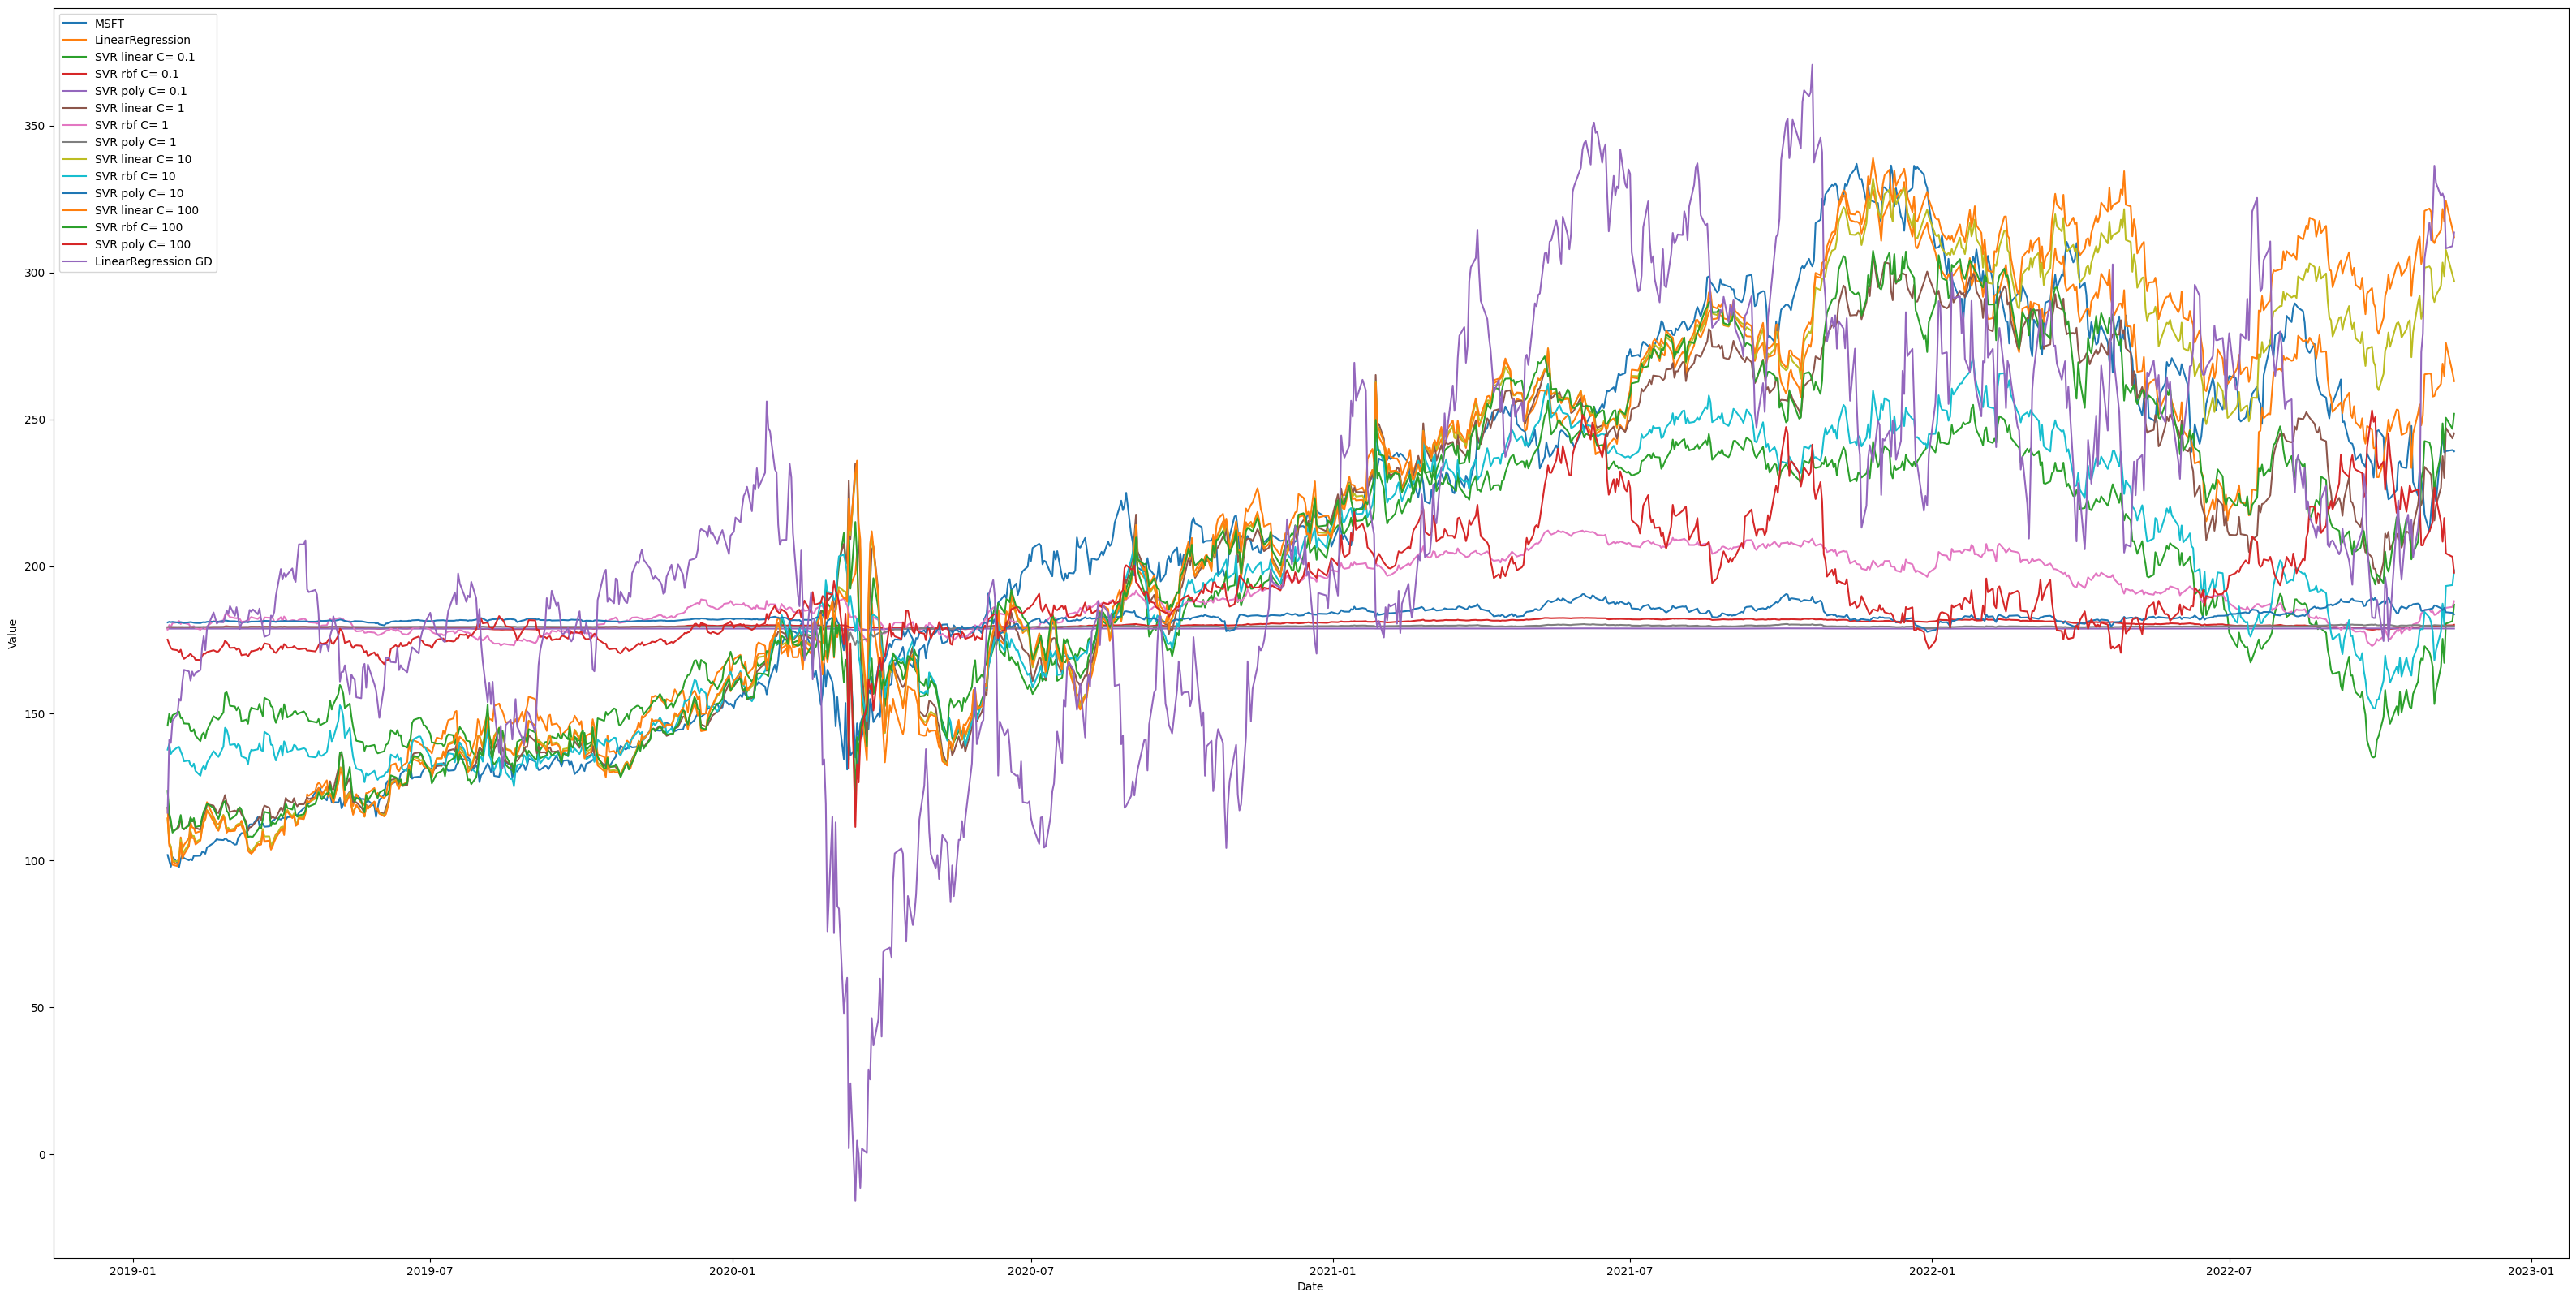

In [26]:
### START CODE HERE ###
plt.figure(figsize=(40, 20))
for col in YCopy.columns:  # Skipping the first column 'x'
    plt.plot(YCopy.index, YCopy[col], label=col)

plt.xlabel('Date')
plt.ylabel('Value')

plt.legend()

plt.show()
### END CODE HERE ###

### Question
1. Rank Top 3 Models with Best prediction (Best MSE)
2. What would be the reason for large error from 2023-05 to 2024-01?

In [27]:
# Ans
#1
# (LinearRegression) MSE: 325.6209546831692
# (SVR) Parameters: C=10, kernel=linear, MSE: 775.2990005587466
# (SVR) Parameters: C=1, kernel=linear, MSE: 787.330638229859

#2
#don't have data because Nan data. (data is droped by dropna())
